In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/scratchV5")

In [ ]:
from MyApp.MultiColumnLabelEncoder import MultiColumnLabelEncoder
from sklearn import preprocessing
import pandas as pd
from sklearn import preprocessing
import os
#print(os.getcwd())
#os.chdir("./MyApp")
from MyApp.feature_extractors.geo_political_risk import geo_political_risk
from MyApp.feature_extractors.amazon_trends import amazon_trends
from MyApp.feature_extractors.india_cpi import india_cpi
from MyApp.feature_extractors.pet_consumption import pet_consumption_fun
from MyApp.feature_extractors.railway_goods import railway_goods_fun
from MyApp.feature_extractors.rainfall_india import rainfall_india_fun
from MyApp.feature_extractors.air_quality import air_quality_fun
from MyApp.feature_extractors.date_specific_features import date_specific_features_fun
#os.chdir("../")
from MyApp.merge_for_economics import merge_for_economics
from MyApp.feature_extractors.other_numeric_features import merge_for_other_features



In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 26 23:28:23 2022

@author: DELL
"""

import pandas as pd
import numpy as np
# summarize class distribution
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from MyApp.merging_encoding import merging_encoding
from MyApp.label_utils import create_days_delayed
import os
import torch
import pandas as pd
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()
import pandas as pd



Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:


import pandas as pd
import pandas as pd
import numpy as np
# summarize class distribution
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from MyApp.label_utils import create_days_delayed
import os
import torch
import pandas as pd
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout,Embedding,Conv1D,MaxPooling1D,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import random
import numpy as np
from sklearn.model_selection import train_test_split
from MyApp.cm import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
import pandas as pd


import csv
import keras




    


In [ ]:
!pip install focal_loss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def training(epochs,model_name):
    from tensorflow import keras
    ip = keras.Input(shape=(X_train.shape[1],X_train.shape[2]), name="input")
    x = keras.layers.Conv1D(64, kernel_size=1, activation="relu")(ip)
    x = keras.layers.Conv1D(32, kernel_size=1, activation="relu")(x)
    x = keras.layers.Conv1D(32, kernel_size=1, activation="relu")(x)
    #x = keras.layers.GlobalMaxPooling1D()(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.7)(x)

    out = keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True))(ip)
    out = keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True))(out)
    out = keras.layers.Bidirectional(keras.layers.LSTM(16, return_sequences=False))(out)
    out = keras.layers.BatchNormalization()(out)
    out = keras.layers.Dropout(0.7)(out)

    x = keras.layers.Flatten()(x)
    out = keras.layers.Flatten()(out)
    combined = keras.layers.concatenate([x,out])
    #combined = keras.layers.Dense(512, activation="relu")(out)
    #combined = keras.layers.Dropout(0.7)(combined)
    #combined = keras.layers.Dense(128, activation="relu")(combined)
    #combined = keras.layers.Dropout(0.7)(combined)
    out = keras.layers.Dense(1, activation="sigmoid")(combined)


    model = keras.Model(ip, out)

    from focal_loss import BinaryFocalLoss
    model.compile(
        optimizer=keras.optimizers.Adam(0.001),
        loss='binary_crossentropy',metrics=['accuracy']) # BinaryFocalLoss(gamma=2)

    H=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    model.save("./MyApp/"+model_name)
    tr_pred=model.predict(X_train)
    tr_pred=(tr_pred>0.5).astype(np.int8)

    pred=model.predict(X_test)
    pred=(pred>0.5).astype(np.int8)

    from MyApp.cm import plot_confusion_matrix

    from sklearn.metrics import confusion_matrix
    tr_cm = confusion_matrix(y_train,tr_pred)
    cm = confusion_matrix(y_test,pred)
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm, classes=[],
                          title='Confusion matrix, without normalization')
    from sklearn.metrics import classification_report


    print(classification_report(y_test, pred))
    return model,X_train, X_test, y_train, y_test,tr_cm,cm

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def spreproces_data(X,days_delayed,pcs_components,ss,training_set,with_label=True):
  if(training_set==True):
    X['air_quality_kolkata'].fillna((X['air_quality_kolkata'].mean()), inplace=True)
    X['air_quality_newdehli'].fillna((X['air_quality_newdehli'].mean()), inplace=True)
    X['rainfall_india_data'].fillna((X['rainfall_india_data'].mean()), inplace=True)
    X['trends'].fillna((X['trends'].mean()), inplace=True)
    y=(pd.read_csv("./y8_train_processed.csv",engine='python')['Days_Delayed']>days_delayed).astype(np.int8)
    dataset=pd.concat([X,y],axis=1)
    X_=dataset.iloc[:,:-1] #.drop_duplicates()
    y_=dataset.iloc[:,-1:]
    sc = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(
      np.array(X_), np.array(y_), test_size=0.10,shuffle=True, random_state=42)
    pca = PCA(n_components = pcs_components)
    X_train = sc.fit_transform(X_train)
    with open(ss, 'wb') as f: 
      pickle.dump(sc, f)
    X_test = sc.transform(X_test)
    #X_train = pca.fit_transform(X_train)
    with open("./pca.obj", 'wb') as f:  
      pickle.dump(pca, f)
    #X_test = pca.transform(X_test)
    over = SMOTE(sampling_strategy=0.9) 
    under = RandomUnderSampler(sampling_strategy=0.2) 
    steps = [ ('u', under),('o', over)] #('o', over)
    pipeline = Pipeline(steps=steps)
    print("samples before augmentation"+str(len(X_train)))
    X_train, y_train = pipeline.fit_resample(X_train, y_train)
    print("samples before augmentation"+str(len(X_train)))
    X_train = np.reshape(np.array(X_train), (X_train.shape[0],1, X_train.shape[1]))
    X_test = np.reshape(np.array(X_test), (X_test.shape[0],1, X_test.shape[1]))
    return X_train, X_test, y_train, y_test


In [ ]:
    X=pd.read_csv("./X8_train_processed.csv")


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,14,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
X.iloc[:,9833:13685].head()

In [ ]:
X.shape

(49214, 18676)

In [ ]:
X=pd.read_csv("./X4_train_processed.csv").iloc[:,21:]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,13,14,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# y=(pd.read_csv("./y4_train_processed.csv",engine='python')['Days_Delayed']>5).astype(np.int8) #../dataset/Yprocessed.csv



In [ ]:
X.columns[:352]

Index(['Unnamed: 0', 'ITEM_COST_WAC', 'ITEM_DSCR', 'CNCL_QTY', 'RCV_QTY',
       'ORIG_ORD_QTY', 'CNCL_DT', 'DELIVERY_DT', 'PO_ORD_DT', 'time',
       ...
       'close_EURUSD - Euro / US Dollar', 'volume_EURUSD - Euro / US Dollar',
       'open_GBPUSD - British Pound / US Dollar',
       'high_GBPUSD - British Pound / US Dollar',
       'low_GBPUSD - British Pound / US Dollar',
       'close_GBPUSD - British Pound / US Dollar',
       'volume_GBPUSD - British Pound / US Dollar', 'air_quality_kolkata',
       'trends',
       'foreign_direct_investment__3months_backward_ALBANIAFORDIRINV'],
      dtype='object', length=352)

samples before augmentation44292
samples before augmentation48345


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 48345 samples, validate on 4922 samples
Epoch 1/40
48345/48345 [==============================] - ETA: 0s - loss: 0.5061 - acc: 0.7685

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


48345/48345 [==============================] - 12s 253us/sample - loss: 0.5061 - acc: 0.7685 - val_loss: 0.3848 - val_acc: 0.8939
Epoch 2/40
48345/48345 [==============================] - 4s 89us/sample - loss: 0.3512 - acc: 0.8574 - val_loss: 0.3200 - val_acc: 0.8525
Epoch 3/40
48345/48345 [==============================] - 4s 89us/sample - loss: 0.3150 - acc: 0.8734 - val_loss: 0.3004 - val_acc: 0.8801
Epoch 4/40
48345/48345 [==============================] - 4s 89us/sample - loss: 0.2994 - acc: 0.8788 - val_loss: 0.2777 - val_acc: 0.8777
Epoch 5/40
48345/48345 [==============================] - 4s 88us/sample - loss: 0.2876 - acc: 0.8853 - val_loss: 0.2517 - val_acc: 0.8929
Epoch 6/40
48345/48345 [==============================] - 4s 90us/sample - loss: 0.2762 - acc: 0.8893 - val_loss: 0.2767 - val_acc: 0.8761
Epoch 7/40
48345/48345 [==============================] - 4s 89us/sample - loss: 0.2656 - acc: 0.8949 - val_loss: 0.2855 - val_acc: 0.8748
Epoch 8/40
48345/48345 [============

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[3990  376]
 [  68  488]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      4366
           1       0.56      0.88      0.69       556

    accuracy                           0.91      4922
   macro avg       0.77      0.90      0.82      4922
weighted avg       0.94      0.91      0.92      4922



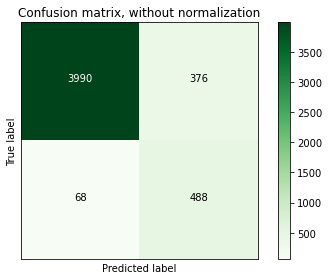

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,351:3350]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,5,None,"./standardscaler3m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model5_lookback3m.h5")

samples before augmentation44292
samples before augmentation48345


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 48345 samples, validate on 4922 samples
Epoch 1/40
48345/48345 [==============================] - ETA: 0s - loss: 0.5060 - acc: 0.7683

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


48345/48345 [==============================] - 14s 288us/sample - loss: 0.5060 - acc: 0.7683 - val_loss: 0.4100 - val_acc: 0.8811
Epoch 2/40
48345/48345 [==============================] - 5s 95us/sample - loss: 0.3508 - acc: 0.8575 - val_loss: 0.2764 - val_acc: 0.8850
Epoch 3/40
48345/48345 [==============================] - 5s 94us/sample - loss: 0.3217 - acc: 0.8733 - val_loss: 0.2960 - val_acc: 0.8828
Epoch 4/40
48345/48345 [==============================] - 5s 95us/sample - loss: 0.3060 - acc: 0.8790 - val_loss: 0.2754 - val_acc: 0.8816
Epoch 5/40
48345/48345 [==============================] - 5s 94us/sample - loss: 0.2969 - acc: 0.8833 - val_loss: 0.3350 - val_acc: 0.8578
Epoch 6/40
48345/48345 [==============================] - 5s 94us/sample - loss: 0.2812 - acc: 0.8887 - val_loss: 0.3152 - val_acc: 0.8614
Epoch 7/40
48345/48345 [==============================] - 5s 94us/sample - loss: 0.2802 - acc: 0.8912 - val_loss: 0.2495 - val_acc: 0.8962
Epoch 8/40
48345/48345 [============

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[3919  447]
 [  52  504]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4366
           1       0.53      0.91      0.67       556

    accuracy                           0.90      4922
   macro avg       0.76      0.90      0.80      4922
weighted avg       0.94      0.90      0.91      4922



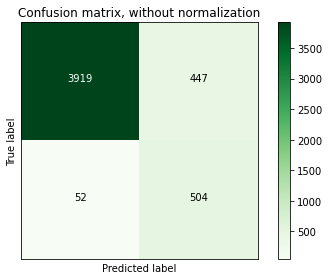

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,351:3350]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,5,None,training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model5_lookback3m.h5")

samples before augmentation44292
samples before augmentation31901


Train on 31901 samples, validate on 4922 samples
Epoch 1/40
31744/31901 [============================>.] - ETA: 0s - loss: 0.5701 - acc: 0.7406

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


31901/31901 [==============================] - 4s 140us/sample - loss: 0.5688 - acc: 0.7412 - val_loss: 0.4053 - val_acc: 0.8866
Epoch 2/40
31901/31901 [==============================] - 3s 95us/sample - loss: 0.3573 - acc: 0.8553 - val_loss: 0.2654 - val_acc: 0.9031
Epoch 3/40
31901/31901 [==============================] - 3s 95us/sample - loss: 0.3159 - acc: 0.8761 - val_loss: 0.2600 - val_acc: 0.8885
Epoch 4/40
31901/31901 [==============================] - 3s 95us/sample - loss: 0.2887 - acc: 0.8876 - val_loss: 0.2768 - val_acc: 0.8757
Epoch 5/40
31901/31901 [==============================] - 3s 95us/sample - loss: 0.2697 - acc: 0.8932 - val_loss: 0.3192 - val_acc: 0.8647
Epoch 6/40
31901/31901 [==============================] - 3s 95us/sample - loss: 0.2613 - acc: 0.9000 - val_loss: 0.2339 - val_acc: 0.8941
Epoch 7/40
31901/31901 [==============================] - 3s 95us/sample - loss: 0.2540 - acc: 0.9028 - val_loss: 0.2344 - val_acc: 0.8954
Epoch 8/40
31901/31901 [=============

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4196  348]
 [  38  340]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      4544
           1       0.49      0.90      0.64       378

    accuracy                           0.92      4922
   macro avg       0.74      0.91      0.80      4922
weighted avg       0.95      0.92      0.93      4922



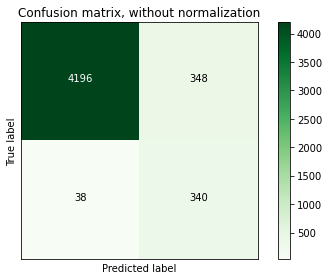

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,351:3350]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,10,None,"./standardscaler3m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model10_lookback3m.h5")

samples before augmentation44292
samples before augmentation21308


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 21308 samples, validate on 4922 samples
Epoch 1/40
21308/21308 [==============================] - ETA: 0s - loss: 0.5930 - acc: 0.7349

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


21308/21308 [==============================] - 12s 557us/sample - loss: 0.5930 - acc: 0.7349 - val_loss: 0.4337 - val_acc: 0.8320
Epoch 2/40
21308/21308 [==============================] - 2s 109us/sample - loss: 0.3506 - acc: 0.8641 - val_loss: 0.2884 - val_acc: 0.9285
Epoch 3/40
21308/21308 [==============================] - 2s 100us/sample - loss: 0.2769 - acc: 0.8982 - val_loss: 0.2590 - val_acc: 0.9118
Epoch 4/40
21308/21308 [==============================] - 2s 101us/sample - loss: 0.2489 - acc: 0.9057 - val_loss: 0.2141 - val_acc: 0.9145
Epoch 5/40
21308/21308 [==============================] - 2s 101us/sample - loss: 0.2256 - acc: 0.9172 - val_loss: 0.2428 - val_acc: 0.8970
Epoch 6/40
21308/21308 [==============================] - 2s 101us/sample - loss: 0.2159 - acc: 0.9214 - val_loss: 0.1646 - val_acc: 0.9374
Epoch 7/40
21308/21308 [==============================] - 2s 100us/sample - loss: 0.2040 - acc: 0.9281 - val_loss: 0.1779 - val_acc: 0.9291
Epoch 8/40
21308/21308 [======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4388  275]
 [  28  231]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      4663
           1       0.46      0.89      0.60       259

    accuracy                           0.94      4922
   macro avg       0.73      0.92      0.79      4922
weighted avg       0.97      0.94      0.95      4922



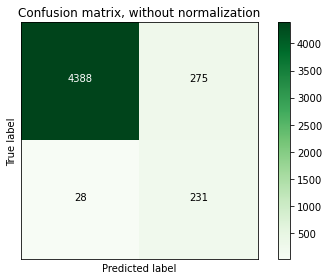

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,351:3350]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,15,None,"./standardscaler3m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model15_lookback3m.h5")


samples before augmentation44292
samples before augmentation31901


Train on 31901 samples, validate on 4922 samples
Epoch 1/40
31744/31901 [============================>.] - ETA: 0s - loss: 0.5466 - acc: 0.7459

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


31901/31901 [==============================] - 5s 149us/sample - loss: 0.5459 - acc: 0.7463 - val_loss: 0.4039 - val_acc: 0.9019
Epoch 2/40
31901/31901 [==============================] - 3s 100us/sample - loss: 0.3323 - acc: 0.8695 - val_loss: 0.2406 - val_acc: 0.9183
Epoch 3/40
31901/31901 [==============================] - 3s 100us/sample - loss: 0.2904 - acc: 0.8879 - val_loss: 0.2547 - val_acc: 0.8907
Epoch 4/40
31901/31901 [==============================] - 3s 99us/sample - loss: 0.2691 - acc: 0.8960 - val_loss: 0.2650 - val_acc: 0.8913
Epoch 5/40
31901/31901 [==============================] - 3s 98us/sample - loss: 0.2547 - acc: 0.9024 - val_loss: 0.2608 - val_acc: 0.8927
Epoch 6/40
31901/31901 [==============================] - 3s 99us/sample - loss: 0.2510 - acc: 0.9042 - val_loss: 0.2507 - val_acc: 0.8966
Epoch 7/40
31901/31901 [==============================] - 3s 98us/sample - loss: 0.2386 - acc: 0.9093 - val_loss: 0.2533 - val_acc: 0.8968
Epoch 8/40
31901/31901 [===========

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4166  378]
 [  37  341]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4544
           1       0.47      0.90      0.62       378

    accuracy                           0.92      4922
   macro avg       0.73      0.91      0.79      4922
weighted avg       0.95      0.92      0.93      4922



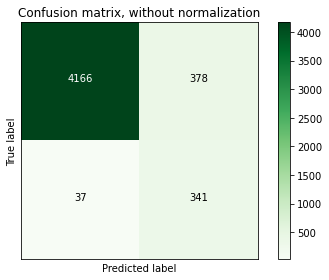

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,351:3350]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,10,None,"./standardscaler3m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model15_lookback3m.h5")


samples before augmentation44292


samples before augmentation6564


Train on 6564 samples, validate on 4922 samples
Epoch 1/40
6564/6564 [==============================] - ETA: 0s - loss: 0.5534 - acc: 0.7444

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6564/6564 [==============================] - 3s 397us/sample - loss: 0.5534 - acc: 0.7444 - val_loss: 0.2935 - val_acc: 0.9466
Epoch 2/40
6564/6564 [==============================] - 1s 123us/sample - loss: 0.3034 - acc: 0.8806 - val_loss: 0.3181 - val_acc: 0.9303
Epoch 3/40
6564/6564 [==============================] - 1s 122us/sample - loss: 0.2165 - acc: 0.9231 - val_loss: 0.2533 - val_acc: 0.9571
Epoch 4/40
6564/6564 [==============================] - 1s 124us/sample - loss: 0.1838 - acc: 0.9391 - val_loss: 0.2437 - val_acc: 0.9480
Epoch 5/40
6564/6564 [==============================] - 1s 122us/sample - loss: 0.1574 - acc: 0.9464 - val_loss: 0.2644 - val_acc: 0.9307
Epoch 6/40
6564/6564 [==============================] - 1s 123us/sample - loss: 0.1646 - acc: 0.9476 - val_loss: 0.2157 - val_acc: 0.9248
Epoch 7/40
6564/6564 [==============================] - 1s 121us/sample - loss: 0.1580 - acc: 0.9487 - val_loss: 0.1198 - val_acc: 0.9718
Epoch 8/40
6564/6564 [=======================

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4689  142]
 [   8   83]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4831
           1       0.37      0.91      0.53        91

    accuracy                           0.97      4922
   macro avg       0.68      0.94      0.75      4922
weighted avg       0.99      0.97      0.98      4922



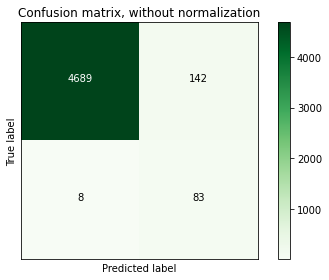

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,351:3350]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,28,None,"./standardscaler3m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model128_lookback3m.h5")


samples before augmentation44292
samples before augmentation48345


Train on 48345 samples, validate on 4922 samples
Epoch 1/40
48345/48345 [==============================] - ETA: 0s - loss: 0.5511 - acc: 0.7386

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


48345/48345 [==============================] - 7s 146us/sample - loss: 0.5511 - acc: 0.7386 - val_loss: 0.4528 - val_acc: 0.8228
Epoch 2/40
48345/48345 [==============================] - 5s 100us/sample - loss: 0.3704 - acc: 0.8431 - val_loss: 0.3118 - val_acc: 0.8797
Epoch 3/40
48345/48345 [==============================] - 5s 102us/sample - loss: 0.3380 - acc: 0.8608 - val_loss: 0.2834 - val_acc: 0.8785
Epoch 4/40
48345/48345 [==============================] - 5s 106us/sample - loss: 0.3025 - acc: 0.8772 - val_loss: 0.2920 - val_acc: 0.8643
Epoch 5/40
48345/48345 [==============================] - 5s 106us/sample - loss: 0.2846 - acc: 0.8838 - val_loss: 0.2773 - val_acc: 0.8809
Epoch 6/40
48345/48345 [==============================] - 5s 108us/sample - loss: 0.2689 - acc: 0.8930 - val_loss: 0.2918 - val_acc: 0.8704
Epoch 7/40
48345/48345 [==============================] - 5s 102us/sample - loss: 0.2586 - acc: 0.8969 - val_loss: 0.2911 - val_acc: 0.8690
Epoch 8/40
48345/48345 [=======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[3896  470]
 [  48  508]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      4366
           1       0.52      0.91      0.66       556

    accuracy                           0.89      4922
   macro avg       0.75      0.90      0.80      4922
weighted avg       0.93      0.89      0.91      4922



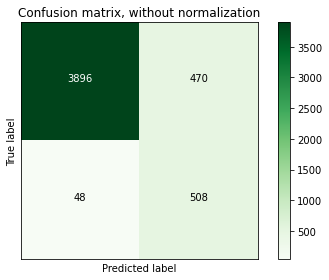

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,3350:6409]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,5,None,"./standardscaler4m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model5_lookback4m.h5")


samples before augmentation44292
samples before augmentation31901


Train on 31901 samples, validate on 4922 samples
Epoch 1/40
31901/31901 [==============================] - ETA: 0s - loss: 0.5242 - acc: 0.7551

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


31901/31901 [==============================] - 5s 169us/sample - loss: 0.5242 - acc: 0.7551 - val_loss: 0.4656 - val_acc: 0.8836
Epoch 2/40
31901/31901 [==============================] - 3s 102us/sample - loss: 0.3490 - acc: 0.8553 - val_loss: 0.2543 - val_acc: 0.9175
Epoch 3/40
31901/31901 [==============================] - 3s 101us/sample - loss: 0.3047 - acc: 0.8797 - val_loss: 0.2798 - val_acc: 0.8734
Epoch 4/40
31901/31901 [==============================] - 3s 103us/sample - loss: 0.2767 - acc: 0.8895 - val_loss: 0.2790 - val_acc: 0.8828
Epoch 5/40
31901/31901 [==============================] - 3s 104us/sample - loss: 0.2749 - acc: 0.8905 - val_loss: 0.2563 - val_acc: 0.9013
Epoch 6/40
31901/31901 [==============================] - 3s 103us/sample - loss: 0.2650 - acc: 0.8972 - val_loss: 0.2650 - val_acc: 0.8905
Epoch 7/40
31901/31901 [==============================] - 3s 103us/sample - loss: 0.2574 - acc: 0.8997 - val_loss: 0.2397 - val_acc: 0.8946
Epoch 8/40
31901/31901 [=======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4118  426]
 [  32  346]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4544
           1       0.45      0.92      0.60       378

    accuracy                           0.91      4922
   macro avg       0.72      0.91      0.77      4922
weighted avg       0.95      0.91      0.92      4922



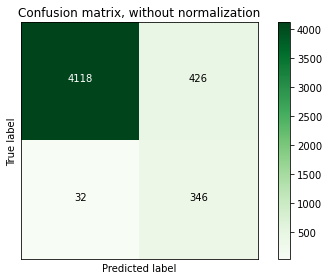

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,3350:6409]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,10,None,"./standardscaler4m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model10_lookback4m.h5")


samples before augmentation44292
samples before augmentation21308


Train on 21308 samples, validate on 4922 samples
Epoch 1/40
21308/21308 [==============================] - ETA: 0s - loss: 0.5502 - acc: 0.7427

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


21308/21308 [==============================] - 5s 223us/sample - loss: 0.5502 - acc: 0.7427 - val_loss: 0.4179 - val_acc: 0.8937
Epoch 2/40
21308/21308 [==============================] - 2s 113us/sample - loss: 0.3300 - acc: 0.8704 - val_loss: 0.3078 - val_acc: 0.9258
Epoch 3/40
21308/21308 [==============================] - 2s 111us/sample - loss: 0.2754 - acc: 0.8973 - val_loss: 0.2105 - val_acc: 0.9346
Epoch 4/40
21308/21308 [==============================] - 2s 109us/sample - loss: 0.2392 - acc: 0.9133 - val_loss: 0.1898 - val_acc: 0.9368
Epoch 5/40
21308/21308 [==============================] - 3s 119us/sample - loss: 0.2364 - acc: 0.9170 - val_loss: 0.2177 - val_acc: 0.9102
Epoch 6/40
21308/21308 [==============================] - 3s 118us/sample - loss: 0.2211 - acc: 0.9226 - val_loss: 0.2269 - val_acc: 0.9015
Epoch 7/40
21308/21308 [==============================] - 2s 109us/sample - loss: 0.2141 - acc: 0.9246 - val_loss: 0.3357 - val_acc: 0.8736
Epoch 8/40
21308/21308 [=======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4347  316]
 [  16  243]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4663
           1       0.43      0.94      0.59       259

    accuracy                           0.93      4922
   macro avg       0.72      0.94      0.78      4922
weighted avg       0.97      0.93      0.94      4922



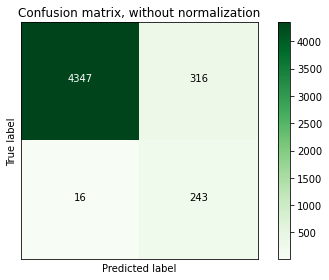

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,3350:6409]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,15,None,"./standardscaler4m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model15_lookback4m.h5")


samples before augmentation44292


samples before augmentation6564


Train on 6564 samples, validate on 4922 samples
Epoch 1/40
6564/6564 [==============================] - ETA: 0s - loss: 0.5723 - acc: 0.7448

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6564/6564 [==============================] - 4s 535us/sample - loss: 0.5723 - acc: 0.7448 - val_loss: 0.3142 - val_acc: 0.9082
Epoch 2/40
6564/6564 [==============================] - 1s 135us/sample - loss: 0.3201 - acc: 0.8694 - val_loss: 0.3102 - val_acc: 0.9413
Epoch 3/40
6564/6564 [==============================] - 1s 152us/sample - loss: 0.2258 - acc: 0.9165 - val_loss: 0.2931 - val_acc: 0.9228
Epoch 4/40
6564/6564 [==============================] - 1s 169us/sample - loss: 0.1773 - acc: 0.9406 - val_loss: 0.2109 - val_acc: 0.9649
Epoch 5/40
6564/6564 [==============================] - 1s 141us/sample - loss: 0.1584 - acc: 0.9491 - val_loss: 0.1389 - val_acc: 0.9813
Epoch 6/40
6564/6564 [==============================] - 1s 139us/sample - loss: 0.1554 - acc: 0.9455 - val_loss: 0.1788 - val_acc: 0.9657
Epoch 7/40
6564/6564 [==============================] - 1s 138us/sample - loss: 0.1327 - acc: 0.9563 - val_loss: 0.1145 - val_acc: 0.9716
Epoch 8/40
6564/6564 [=======================

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4640  191]
 [   7   84]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4831
           1       0.31      0.92      0.46        91

    accuracy                           0.96      4922
   macro avg       0.65      0.94      0.72      4922
weighted avg       0.99      0.96      0.97      4922



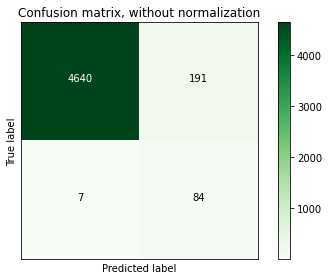

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,3350:6409]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,28,None,"./standardscaler4m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model28_lookback4m.h5")


# 5 Month LookBack

samples before augmentation44292
samples before augmentation48345


Train on 48345 samples, validate on 4922 samples
Epoch 1/40
48345/48345 [==============================] - ETA: 0s - loss: 0.5469 - acc: 0.7548

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


48345/48345 [==============================] - 8s 165us/sample - loss: 0.5469 - acc: 0.7548 - val_loss: 0.4606 - val_acc: 0.8068
Epoch 2/40
48345/48345 [==============================] - 5s 106us/sample - loss: 0.3559 - acc: 0.8544 - val_loss: 0.3346 - val_acc: 0.8677
Epoch 3/40
48345/48345 [==============================] - 5s 105us/sample - loss: 0.3190 - acc: 0.8730 - val_loss: 0.2453 - val_acc: 0.8962
Epoch 4/40
48345/48345 [==============================] - 5s 103us/sample - loss: 0.3034 - acc: 0.8809 - val_loss: 0.3727 - val_acc: 0.8387
Epoch 5/40
48345/48345 [==============================] - 5s 108us/sample - loss: 0.2911 - acc: 0.8873 - val_loss: 0.2843 - val_acc: 0.8793
Epoch 6/40
48345/48345 [==============================] - 5s 111us/sample - loss: 0.2774 - acc: 0.8916 - val_loss: 0.2788 - val_acc: 0.8826
Epoch 7/40
48345/48345 [==============================] - 5s 109us/sample - loss: 0.2662 - acc: 0.8965 - val_loss: 0.2481 - val_acc: 0.8939
Epoch 8/40
48345/48345 [=======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[3951  415]
 [  55  501]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4366
           1       0.55      0.90      0.68       556

    accuracy                           0.90      4922
   macro avg       0.77      0.90      0.81      4922
weighted avg       0.94      0.90      0.91      4922



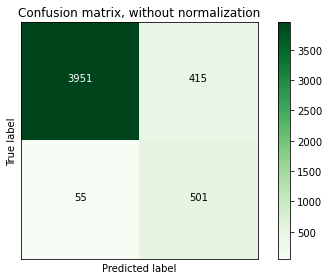

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,6409:9465]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,5,None,"./standardscaler5m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model5_lookback5m.h5")


samples before augmentation44292
samples before augmentation31901


Train on 31901 samples, validate on 4922 samples
Epoch 1/40
31901/31901 [==============================] - ETA: 0s - loss: 0.5643 - acc: 0.7321

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


31901/31901 [==============================] - 7s 206us/sample - loss: 0.5643 - acc: 0.7321 - val_loss: 0.6282 - val_acc: 0.6570
Epoch 2/40
31901/31901 [==============================] - 3s 108us/sample - loss: 0.3550 - acc: 0.8582 - val_loss: 0.3085 - val_acc: 0.8982
Epoch 3/40
31901/31901 [==============================] - 3s 104us/sample - loss: 0.2998 - acc: 0.8835 - val_loss: 0.2491 - val_acc: 0.8960
Epoch 4/40
31901/31901 [==============================] - 3s 108us/sample - loss: 0.2770 - acc: 0.8922 - val_loss: 0.2796 - val_acc: 0.8824
Epoch 5/40
31901/31901 [==============================] - 3s 102us/sample - loss: 0.2630 - acc: 0.8998 - val_loss: 0.2834 - val_acc: 0.8813
Epoch 6/40
31901/31901 [==============================] - 3s 101us/sample - loss: 0.2537 - acc: 0.9030 - val_loss: 0.2569 - val_acc: 0.8893
Epoch 7/40
31901/31901 [==============================] - 3s 103us/sample - loss: 0.2559 - acc: 0.9016 - val_loss: 0.2853 - val_acc: 0.8639
Epoch 8/40
31901/31901 [=======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4176  368]
 [  44  334]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4544
           1       0.48      0.88      0.62       378

    accuracy                           0.92      4922
   macro avg       0.73      0.90      0.79      4922
weighted avg       0.95      0.92      0.93      4922



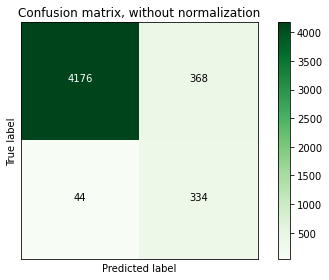

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,6409:9465]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,10,None,"./standardscaler5m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model10_lookback5m.h5")


samples before augmentation44292
samples before augmentation21308


Train on 21308 samples, validate on 4922 samples
Epoch 1/40
21308/21308 [==============================] - ETA: 0s - loss: 0.6126 - acc: 0.7174

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


21308/21308 [==============================] - 6s 266us/sample - loss: 0.6126 - acc: 0.7174 - val_loss: 0.4100 - val_acc: 0.8811
Epoch 2/40
21308/21308 [==============================] - 2s 112us/sample - loss: 0.3429 - acc: 0.8665 - val_loss: 0.2514 - val_acc: 0.9500
Epoch 3/40
21308/21308 [==============================] - 2s 112us/sample - loss: 0.2921 - acc: 0.8904 - val_loss: 0.1747 - val_acc: 0.9366
Epoch 4/40
21308/21308 [==============================] - 2s 115us/sample - loss: 0.2618 - acc: 0.9030 - val_loss: 0.2178 - val_acc: 0.9065
Epoch 5/40
21308/21308 [==============================] - 2s 110us/sample - loss: 0.2411 - acc: 0.9071 - val_loss: 0.1636 - val_acc: 0.9342
Epoch 6/40
21308/21308 [==============================] - 2s 117us/sample - loss: 0.2251 - acc: 0.9184 - val_loss: 0.2014 - val_acc: 0.9246
Epoch 7/40
21308/21308 [==============================] - 2s 112us/sample - loss: 0.2234 - acc: 0.9195 - val_loss: 0.2192 - val_acc: 0.9147
Epoch 8/40
21308/21308 [=======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4318  345]
 [  17  242]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4663
           1       0.41      0.93      0.57       259

    accuracy                           0.93      4922
   macro avg       0.70      0.93      0.77      4922
weighted avg       0.97      0.93      0.94      4922



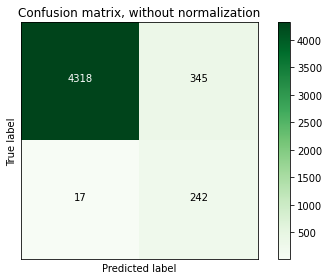

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,6409:9465]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,15,None,"./standardscaler5m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model15_lookback5m.h5")


samples before augmentation44292


samples before augmentation6564


Train on 6564 samples, validate on 4922 samples
Epoch 1/40
6564/6564 [==============================] - ETA: 0s - loss: 0.5616 - acc: 0.7431

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6564/6564 [==============================] - 4s 682us/sample - loss: 0.5616 - acc: 0.7431 - val_loss: 0.5680 - val_acc: 0.6670
Epoch 2/40
6564/6564 [==============================] - 1s 140us/sample - loss: 0.3238 - acc: 0.8720 - val_loss: 0.3845 - val_acc: 0.8279
Epoch 3/40
6564/6564 [==============================] - 1s 142us/sample - loss: 0.2295 - acc: 0.9158 - val_loss: 0.3179 - val_acc: 0.9441
Epoch 4/40
6564/6564 [==============================] - 1s 143us/sample - loss: 0.1970 - acc: 0.9281 - val_loss: 0.2011 - val_acc: 0.9671
Epoch 5/40
6564/6564 [==============================] - 1s 145us/sample - loss: 0.1948 - acc: 0.9328 - val_loss: 0.2822 - val_acc: 0.9193
Epoch 6/40
6564/6564 [==============================] - 1s 151us/sample - loss: 0.1597 - acc: 0.9467 - val_loss: 0.1845 - val_acc: 0.9584
Epoch 7/40
6564/6564 [==============================] - 1s 136us/sample - loss: 0.1516 - acc: 0.9479 - val_loss: 0.1486 - val_acc: 0.9659
Epoch 8/40
6564/6564 [=======================

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4613  218]
 [   7   84]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      4831
           1       0.28      0.92      0.43        91

    accuracy                           0.95      4922
   macro avg       0.64      0.94      0.70      4922
weighted avg       0.99      0.95      0.97      4922



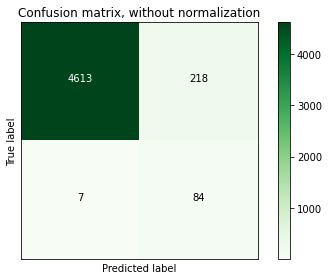

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,6409:9465]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,28,None,"./standardscaler5m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model28_lookback5m.h5")


samples before augmentation44292
samples before augmentation48345


Train on 48345 samples, validate on 4922 samples
Epoch 1/40
48345/48345 [==============================] - ETA: 0s - loss: 0.5193 - acc: 0.7609

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


48345/48345 [==============================] - 9s 192us/sample - loss: 0.5193 - acc: 0.7609 - val_loss: 0.3868 - val_acc: 0.8690
Epoch 2/40
48345/48345 [==============================] - 5s 108us/sample - loss: 0.3430 - acc: 0.8629 - val_loss: 0.3426 - val_acc: 0.8511
Epoch 3/40
48345/48345 [==============================] - 5s 107us/sample - loss: 0.3122 - acc: 0.8788 - val_loss: 0.2417 - val_acc: 0.8996
Epoch 4/40
48345/48345 [==============================] - 5s 110us/sample - loss: 0.2924 - acc: 0.8852 - val_loss: 0.2926 - val_acc: 0.8864
Epoch 5/40
48345/48345 [==============================] - 5s 113us/sample - loss: 0.2854 - acc: 0.8890 - val_loss: 0.2847 - val_acc: 0.8763
Epoch 6/40
48345/48345 [==============================] - 5s 112us/sample - loss: 0.2731 - acc: 0.8936 - val_loss: 0.3081 - val_acc: 0.8757
Epoch 7/40
48345/48345 [==============================] - 5s 113us/sample - loss: 0.2652 - acc: 0.8981 - val_loss: 0.2575 - val_acc: 0.8907
Epoch 8/40
48345/48345 [=======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[3995  371]
 [  56  500]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4366
           1       0.57      0.90      0.70       556

    accuracy                           0.91      4922
   macro avg       0.78      0.91      0.83      4922
weighted avg       0.94      0.91      0.92      4922



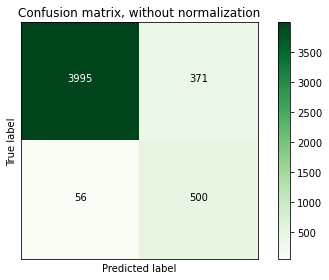

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,9465:]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,5,None,"./standardscaler6m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model5_lookback6m.h5")


samples before augmentation44292
samples before augmentation31901


Train on 31901 samples, validate on 4922 samples
Epoch 1/40
31901/31901 [==============================] - ETA: 0s - loss: 0.5626 - acc: 0.7417

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


31901/31901 [==============================] - 8s 242us/sample - loss: 0.5626 - acc: 0.7417 - val_loss: 0.4600 - val_acc: 0.8427
Epoch 2/40
31901/31901 [==============================] - 4s 121us/sample - loss: 0.3374 - acc: 0.8645 - val_loss: 0.2742 - val_acc: 0.8854
Epoch 3/40
31901/31901 [==============================] - 4s 113us/sample - loss: 0.2974 - acc: 0.8817 - val_loss: 0.2685 - val_acc: 0.8852
Epoch 4/40
31901/31901 [==============================] - 4s 114us/sample - loss: 0.2760 - acc: 0.8905 - val_loss: 0.2608 - val_acc: 0.8921
Epoch 5/40
31901/31901 [==============================] - 4s 118us/sample - loss: 0.2579 - acc: 0.9008 - val_loss: 0.2459 - val_acc: 0.8941
Epoch 6/40
31901/31901 [==============================] - 4s 111us/sample - loss: 0.2477 - acc: 0.9017 - val_loss: 0.2198 - val_acc: 0.9080
Epoch 7/40
31901/31901 [==============================] - 4s 112us/sample - loss: 0.2404 - acc: 0.9074 - val_loss: 0.3073 - val_acc: 0.8702
Epoch 8/40
31901/31901 [=======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4078  466]
 [  34  344]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4544
           1       0.42      0.91      0.58       378

    accuracy                           0.90      4922
   macro avg       0.71      0.90      0.76      4922
weighted avg       0.95      0.90      0.91      4922



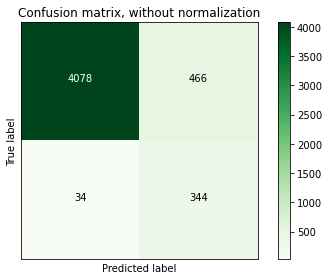

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,9465:]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,10,None,"./standardscaler6m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model10_lookback6m.h5")


samples before augmentation44292
samples before augmentation21308


Train on 21308 samples, validate on 4922 samples
Epoch 1/40
21308/21308 [==============================] - ETA: 0s - loss: 0.5663 - acc: 0.7396

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


21308/21308 [==============================] - 7s 308us/sample - loss: 0.5663 - acc: 0.7396 - val_loss: 0.3843 - val_acc: 0.9116
Epoch 2/40
21308/21308 [==============================] - 2s 114us/sample - loss: 0.3284 - acc: 0.8692 - val_loss: 0.3264 - val_acc: 0.9132
Epoch 3/40
21308/21308 [==============================] - 2s 117us/sample - loss: 0.2702 - acc: 0.8999 - val_loss: 0.2418 - val_acc: 0.9155
Epoch 4/40
21308/21308 [==============================] - 2s 112us/sample - loss: 0.2433 - acc: 0.9089 - val_loss: 0.1703 - val_acc: 0.9287
Epoch 5/40
21308/21308 [==============================] - 3s 121us/sample - loss: 0.2362 - acc: 0.9136 - val_loss: 0.2768 - val_acc: 0.8925
Epoch 6/40
21308/21308 [==============================] - 3s 119us/sample - loss: 0.2162 - acc: 0.9210 - val_loss: 0.1940 - val_acc: 0.9208
Epoch 7/40
21308/21308 [==============================] - 3s 120us/sample - loss: 0.2141 - acc: 0.9242 - val_loss: 0.2890 - val_acc: 0.8948
Epoch 8/40
21308/21308 [=======

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4283  380]
 [  17  242]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4663
           1       0.39      0.93      0.55       259

    accuracy                           0.92      4922
   macro avg       0.69      0.93      0.75      4922
weighted avg       0.96      0.92      0.93      4922



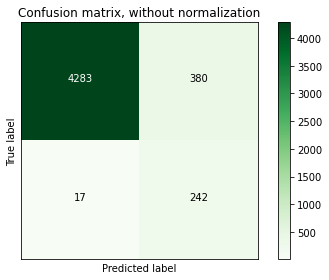

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,9465:]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,15,None,"./standardscaler6m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model15_lookback6m.h5")


samples before augmentation44292


samples before augmentation6564


Train on 6564 samples, validate on 4922 samples
Epoch 1/40
6564/6564 [==============================] - ETA: 0s - loss: 0.5047 - acc: 0.7693

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6564/6564 [==============================] - 5s 827us/sample - loss: 0.5047 - acc: 0.7693 - val_loss: 0.3526 - val_acc: 0.9106
Epoch 2/40
6564/6564 [==============================] - 1s 144us/sample - loss: 0.2645 - acc: 0.8975 - val_loss: 0.2767 - val_acc: 0.9687
Epoch 3/40
6564/6564 [==============================] - 1s 144us/sample - loss: 0.1848 - acc: 0.9336 - val_loss: 0.2851 - val_acc: 0.9295
Epoch 4/40
6564/6564 [==============================] - 1s 145us/sample - loss: 0.1684 - acc: 0.9441 - val_loss: 0.2102 - val_acc: 0.9762
Epoch 5/40
6564/6564 [==============================] - 1s 140us/sample - loss: 0.1545 - acc: 0.9500 - val_loss: 0.2003 - val_acc: 0.9693
Epoch 6/40
6564/6564 [==============================] - 1s 143us/sample - loss: 0.1268 - acc: 0.9569 - val_loss: 0.1287 - val_acc: 0.9699
Epoch 7/40
6564/6564 [==============================] - 1s 151us/sample - loss: 0.1413 - acc: 0.9560 - val_loss: 0.0992 - val_acc: 0.9783
Epoch 8/40
6564/6564 [=======================

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4705  126]
 [   5   86]]
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4831
           1       0.41      0.95      0.57        91

    accuracy                           0.97      4922
   macro avg       0.70      0.96      0.78      4922
weighted avg       0.99      0.97      0.98      4922



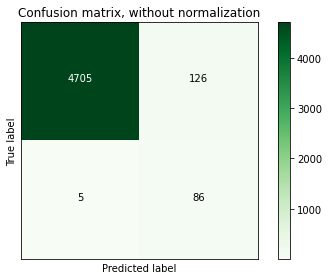

In [ ]:
X1=X.iloc[:,21:351]
X2=X.iloc[:,9465:]
X3=pd.concat([X1,X2],axis=1)
X_train, X_test, y_train, y_test=spreproces_data(X3,28,None,"./standardscaler6m.obj",training_set=True)

model,X_train, X_test, y_train, y_test,train_cm,test_cm=training(40,"model128_lookback6m.h5")
